In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [29]:
data = pd.read_csv("maze_results.csv")
data.drop('ID', axis=1, inplace=True)
print(data.shape)
data.head(50)


(3267, 9)


,Size,Maze Type,Orientation,Agent Type,Symmetry,Density,Dead Ends,Solution Path Length,Average Episodes
0,"(11, 11)",AldousBroder,Square,Q-Determinative,0.18,0.60,8,20,55
1,"(11, 11)",AldousBroder,Square,Q-Student,0.18,0.60,8,20,31
2,"(11, 11)",AldousBroder,Square,Q-Explorer,0.18,0.60,8,20,159
3,"(11, 11)",AldousBroder,Square,Q-Determinative,0.23,0.60,9,18,50
4,"(11, 11)",AldousBroder,Square,Q-Student,0.23,0.60,9,18,26
5,"(11, 11)",AldousBroder,Square,Q-Explorer,0.23,0.60,9,18,139
6,"(11, 11)",AldousBroder,Square,Q-Determinative,0.14,0.60,6,6,7
7,"(11, 11)",AldousBroder,Square,Q-Student,0.14,0.60,6,6,6
8,"(11, 11)",AldousBroder,Square,Q-Explorer,0.14,0.60,6,6,30
9,"(11, 11)",BinaryTree,Square,Q-Determinative,0.14,0.59,7,8,11


In [30]:
# check data types and null values
print(data.info())

# statistics for numerical columns
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3267 entries, 0 to 3266
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Size                  3267 non-null   object 
 1   Maze Type             3267 non-null   object 
 2   Orientation           3267 non-null   object 
 3   Agent Type            3267 non-null   object 
 4   Symmetry              3267 non-null   float64
 5   Density               3267 non-null   float64
 6   Dead Ends             3267 non-null   int64  
 7   Solution Path Length  3267 non-null   int64  
 8   Average Episodes      3267 non-null   int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 229.8+ KB
None
          Symmetry      Density    Dead Ends  Solution Path Length  \
count  3267.000000  3267.000000  3267.000000           3267.000000   
mean      0.094454     0.555895    23.059688             34.803183   
std       0.042501     0.014515    13.331142          

In [31]:
duplicates = data.duplicated()

num_duplicates = duplicates.sum()

print(f"Number of duplicate rows: {num_duplicates}")

Number of duplicate rows: 2


In [32]:
data.drop_duplicates(inplace=True)

In [33]:
duplicates = data.duplicated()

num_duplicates = duplicates.sum()

print(f"Number of duplicate rows: {num_duplicates}")

Number of duplicate rows: 0


In [34]:
data.head(20)

,Size,Maze Type,Orientation,Agent Type,Symmetry,Density,Dead Ends,Solution Path Length,Average Episodes
0,"(11, 11)",AldousBroder,Square,Q-Determinative,0.18,0.60,8,20,55
1,"(11, 11)",AldousBroder,Square,Q-Student,0.18,0.60,8,20,31
2,"(11, 11)",AldousBroder,Square,Q-Explorer,0.18,0.60,8,20,159
3,"(11, 11)",AldousBroder,Square,Q-Determinative,0.23,0.60,9,18,50
4,"(11, 11)",AldousBroder,Square,Q-Student,0.23,0.60,9,18,26
5,"(11, 11)",AldousBroder,Square,Q-Explorer,0.23,0.60,9,18,139
6,"(11, 11)",AldousBroder,Square,Q-Determinative,0.14,0.60,6,6,7
7,"(11, 11)",AldousBroder,Square,Q-Student,0.14,0.60,6,6,6
8,"(11, 11)",AldousBroder,Square,Q-Explorer,0.14,0.60,6,6,30
9,"(11, 11)",BinaryTree,Square,Q-Determinative,0.14,0.59,7,8,11


<ipython-input-39-1a7f7e659a77>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=data, x='Maze Type', y='Average Episodes', hue='Agent Type', ci=None)


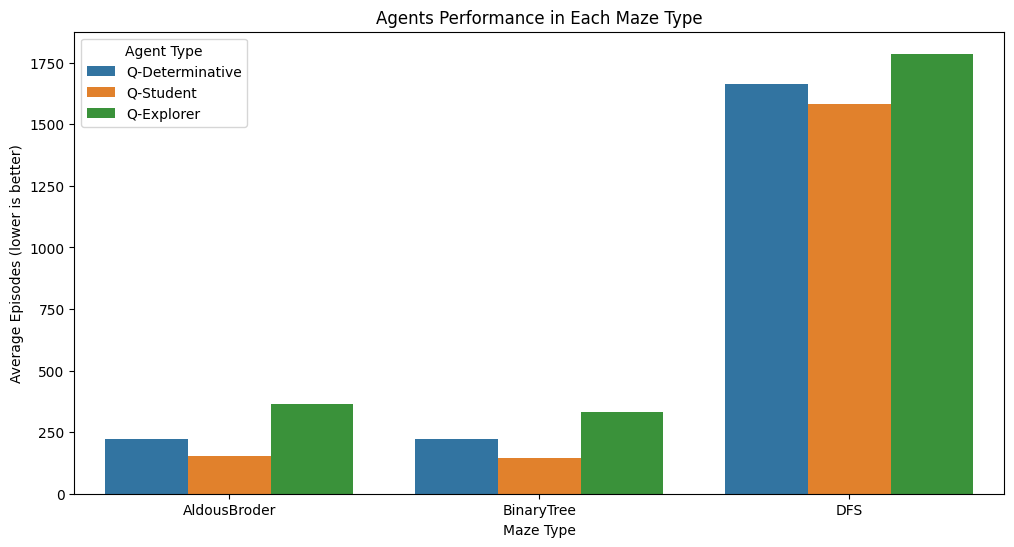

In [39]:
# Agents' performance in each maze type
plt.figure(figsize=(12, 6))
sns.barplot(data=data, x='Maze Type', y='Average Episodes', hue='Agent Type', ci=None)
plt.title('Agents Performance in Each Maze Type')
plt.ylabel('Average Episodes (lower is better)')
plt.xlabel('Maze Type')
plt.legend(title='Agent Type')
plt.show()
# Q-student might perform better on less complex mazes like DFS, while Q-explorer might excel in complex terrains like AldousBroder.


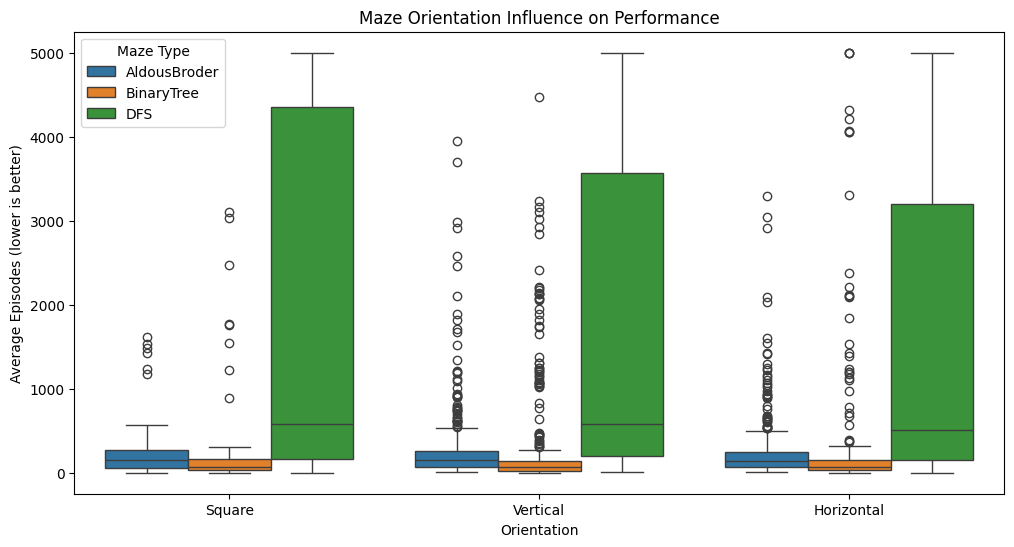

In [40]:
# Influence of maze orientation on performance
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x='Orientation', y='Average Episodes', hue='Maze Type')
plt.title('Maze Orientation Influence on Performance')
plt.ylabel('Average Episodes (lower is better)')
plt.xlabel('Orientation')
plt.legend(title='Maze Type')
plt.show()
# Orientation may or may not significantly affect performance depending on the maze type.


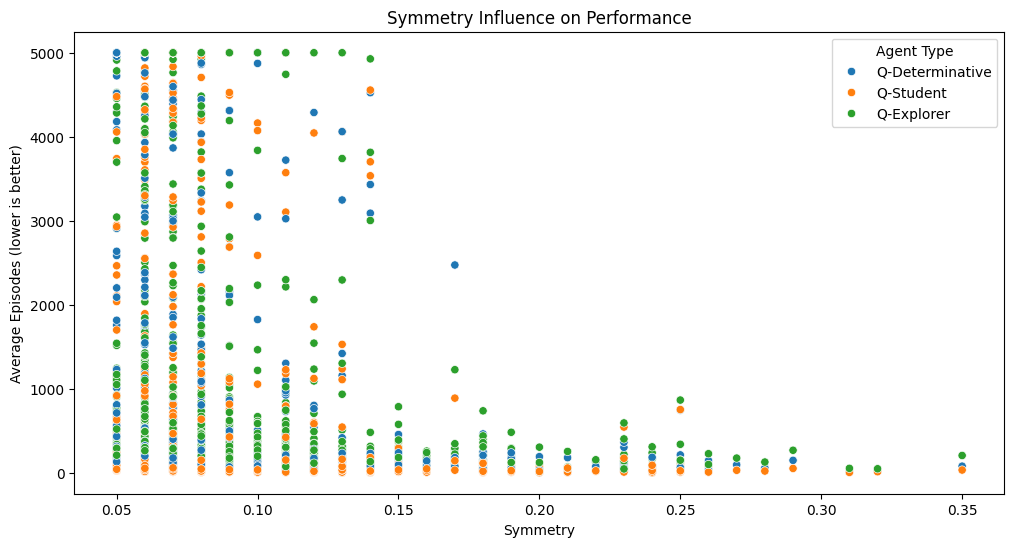

In [41]:
# 3. Influence of symmetry on performance
plt.figure(figsize=(12, 6))
sns.scatterplot(data=data, x='Symmetry', y='Average Episodes', hue='Agent Type')
plt.title('Symmetry Influence on Performance')
plt.ylabel('Average Episodes (lower is better)')
plt.xlabel('Symmetry')
plt.legend(title='Agent Type')
plt.show()
# Observation: Symmetry might have a greater effect on some agents, possibly affecting Q-explorer more due to higher exploration tendencies.


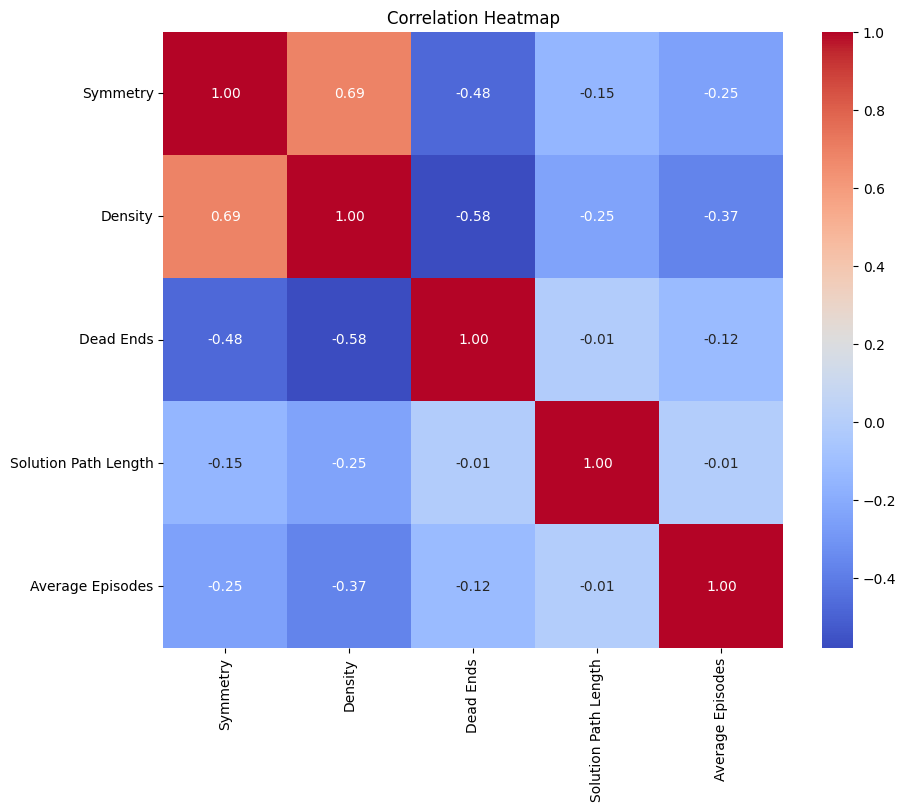

In [46]:
numerical_data = data.select_dtypes(include=["number"])

# correlation matrix
correlation = numerical_data.corr()

# create heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [44]:
# general analysis
print("Summary statistics for each Maze Type and Agent Type combination:")
print(data.groupby(['Maze Type', 'Agent Type'])['Average Episodes'].describe())

Summary statistics for each Maze Type and Agent Type combination:
                              count         mean          std   min    25%  \
Maze Type    Agent Type                                                      
AldousBroder Q-Determinative  363.0   222.449036   332.210634   7.0   93.0   
             Q-Explorer       363.0   364.950413   432.392231  29.0  187.0   
             Q-Student        363.0   153.925620   331.692883   6.0   39.0   
BinaryTree   Q-Determinative  363.0   224.170799   571.094542   7.0   38.0   
             Q-Explorer       363.0   331.055096   688.019174  25.0   99.0   
             Q-Student        363.0   143.914601   479.520520   6.0   19.5   
DFS          Q-Determinative  363.0  1664.732782  1919.991003  10.0  183.0   
             Q-Explorer       362.0  1786.469613  1855.568096  20.0  307.5   
             Q-Student        362.0  1581.781768  1936.282642   7.0   90.5   

                                50%      75%     max  
Maze Type    Agent T

# Analysis
1. Target variable(s)
2. Variable types (categorical and numerical)
3. Missing data
4. Numerical variables
  - Discrete
  - Continuous
  - Distributions
  - Transformations
5. Categorical variables
  - Cardinality
  - Rare labels
  - Special mappings

## Target(s)
The supreme target is the success rate (%). We want to know how many of the agents have been able to successfully solve the maze in a reasonable time.

1. Distributions of numerical columns:

In [ ]:
# @title Density vs Symmetry

# data.plot(kind='scatter', x='Density', y='Symmetry', s=32, alpha=.8)
# plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
# @title Branching Factor

# data['Branching Factor'].plot(kind='hist', bins=20, title='Branching Factor')
# plt.gca().spines[['top', 'right',]].set_visible(False)

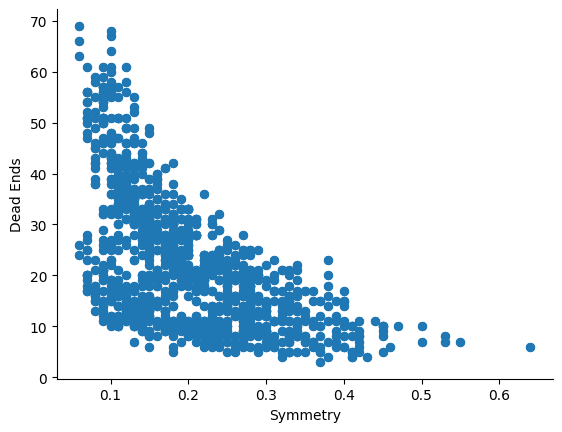

In [ ]:
# @title Symmetry vs Dead Ends

data.plot(kind='scatter', x='Symmetry', y='Dead Ends', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

2. Correlation Heatmap

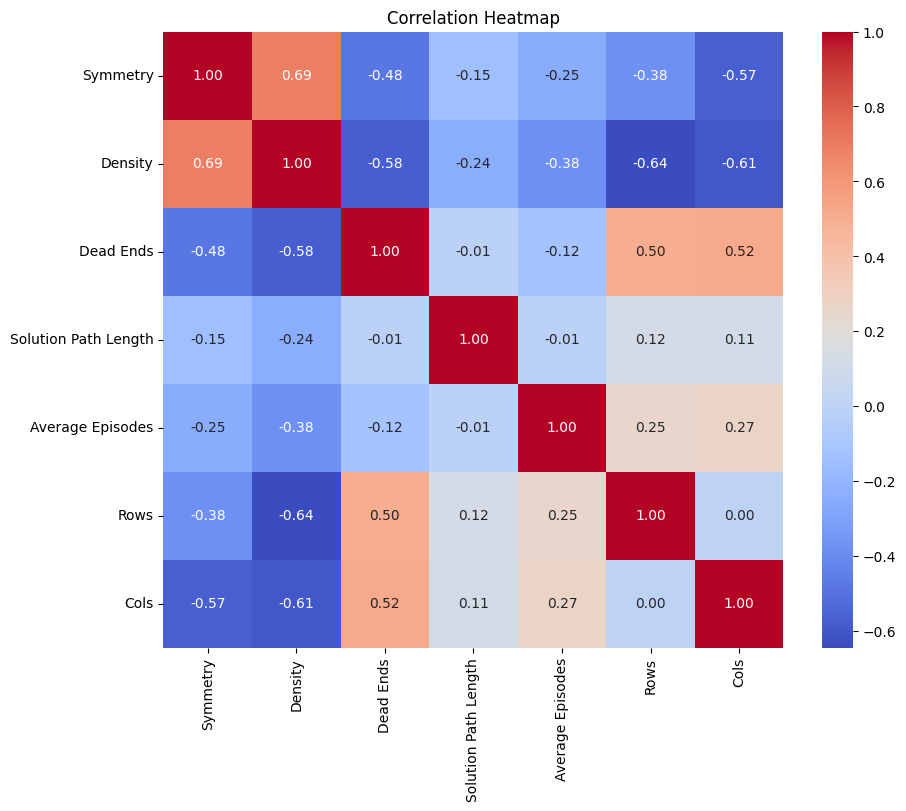

In [22]:
# Select only numerical columns
numerical_data = data.select_dtypes(include=["number"])

# Calculate the correlation matrix
correlation = numerical_data.corr()

# Create heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

Observations
- Perfect correlation (1.00) is between values and themselves on the other axis
- High positive values: One tends to have the other increase
- High negatives: one high value tends to have lower values on the other side
- Weak correlations - one does not really influence the other

Check the most important features

In [24]:
# Convert columns to numeric, coercing errors
data['Branching Factor'] = pd.to_numeric(data['Branching Factor'], errors='coerce')
data['Density'] = pd.to_numeric(data['Density'], errors='coerce')
data['Symmetry'] = pd.to_numeric(data['Symmetry'], errors='coerce')
data['Success Rate (%)'] = pd.to_numeric(data['Success Rate (%)'], errors='coerce')

# Fill NaN values with the mean (or use other strategies like dropna())
data = data.fillna(data.mean())

KeyError: 'Branching Factor'

In [25]:
from sklearn.inspection import permutation_importance

# Get permutation importance
perm_importance = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42)

# Create a DataFrame for permutation importance
perm_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': perm_importance.importances_mean
}).sort_values(by='Importance', ascending=False)

print(perm_importance_df)


NameError: name 'model' is not defined

In [26]:
correlation = data.corr()  # For all features
target_corr = correlation['Success Rate (%)'].drop('Success Rate (%)').sort_values(ascending=False)

print("Feature correlation with target:")
print(target_corr)


ValueError: could not convert string to float: 'AldousBroder'

In [27]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

# Define the model and RFE
model = RandomForestClassifier(random_state=42)
rfe = RFE(model, n_features_to_select=5)  # Choose the number of features to keep
rfe.fit(X, y)

# Get selected features
selected_features = X.columns[rfe.support_]
print("Selected Features:", selected_features)

NameError: name 'X' is not defined

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

# Define the model and RFE
model = RandomForestClassifier(random_state=42)
rfe = RFE(model, n_features_to_select=5)  # Choose the number of features to keep
rfe.fit(X, y)

# Get selected features
selected_features = X.columns[rfe.support_]
print("Selected Features:", selected_features)

# Get feature importance from the RandomForestClassifier model
model.fit(X, y)
importances = model.feature_importances_

# Filter importances based on the selected features
selected_importances = importances[rfe.support_]

# Create a DataFrame for plotting
feature_importance_df = pd.DataFrame({
    'Feature': selected_features,
    'Importance': selected_importances
}).sort_values(by='Importance', ascending=False)

# Plot using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis', hue=None)
plt.title('Feature Importance from RFE with Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


NameError: name 'X' is not defined

NOW, with neural network
- problema: dac q-learning e m rapid si simplu si gaseste in m putine episoade agentul
- q-learning nu se descurca in mazeuri m mari
- neural network nu se descurca in timp, ii treb mult timp de antrenare
- am decis sa lucram cu q-learning, ca sa reusim in timp
- putem folosi q-learning si pe neural network cand nu facem m multe mazeuri


-> putem schimba algoritmul care face mazeuri din dfs in altul
-> concluzie - dac ar fi sa vindem prodsele generate (mazeuri, case smart home adaptate pt roboti), am vinde m scump mazeuri generate cu neural netw, ca ia m mult timp de generat / hardware m puternic